In [1]:
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from einops import rearrange
import inference

import cv2
from scipy.ndimage import label
from skimage.measure import regionprops
from skimage.morphology import dilation, disk

In [2]:
pipe = inference.InferencePipeline()

In [3]:
def show_blend(image_path, change):
    img = Image.open(image_path)
    mask = T.Resize((img.size[1], img.size[0]))(torch.tensor(change).unsqueeze(0))
    mask = mask.squeeze().numpy()
    img = np.array(img)[:, :, :3]
    color_add = np.array([255, 0, 0]) # R G B
    color_fade = np.array([0, 0, 255])
    blended_img = img.copy()
    blended_img[mask == 1] = blended_img[mask == 1] * 0.4 + color_add * 0.6
    blended_img[mask == -1] = blended_img[mask == -1] * 0.4 + color_fade * 0.6
    plt.figure(figsize=(10, 8))
    plt.imshow(blended_img)
    plt.show()

In [4]:
'''
38200:
An example.

82230 51120:
SPOT(1.5m/pixel) has a bad performance on the test set.

09210:
weird result when processing correctly.
shows the defect of using 2 different resolutions.

Les_Hermitants:
seems to be good

Monnerie35340:
seems to have very large misalignment

RtedesVergnes:
Able to detect the change, but with some defects


'''

'\n38200:\nAn example.\n\n82230 51120:\nSPOT(1.5m/pixel) has a bad performance on the test set.\n\n09210:\nweird result when processing correctly.\nshows the defect of using 2 different resolutions.\n\nLes_Hermitants:\nseems to be good\n\nMonnerie35340:\nseems to have very large misalignment\n\nRtedesVergnes:\nAble to detect the change, but with some defects\n\n\n'

In [5]:
image_path1 = "image_client/38200/IMG_PNEO3_202308091037033_PMS-FS_ORT_417a75c7-06d7-46c7-c61b-bd9e17f567ab_RGB_R1C1.TIF"
image_path0 = "image_client/38200/IMG_PNEO4_202205111036334_PMS-FS_ORT_999d0cef-9f8e-4176-c158-3cb7cb764895_RGB_R1C1.TIF"

# image_path1 = ""
# image_path0 = ""

# image_path1 = "image_client/Les_Hermitants/IMG_PHR1A_PMS_202308091107285_ORT_e4f31162-4a88-44b9-c436-10caa0b7bee6_R1C1.TIF"
# image_path0 = "image_client/Les_Hermitants/IMG_PHR1B_PMS_202212051107185_ORT_b3c11138-7d93-449c-c47f-c81267390c0a_R1C1.TIF"

# image_path1 = "image_client/Monnerie35340/IMG_PNEO4_202403291105502_PMS-FS_ORT_d3ade833-6cb5-4200-c229-7672ee67fa15_RGB_R1C1.TIF"
# image_path0 = "image_client/Monnerie35340/IMG_PNEO4_202305271102071_PMS-FS_ORT_be02489e-3ac9-4eac-cead-de14d98d33c4_RGB_R1C1.TIF"

# image_path1 = "image_client/RtedesVergnes/IMG_SPOT6_PMS_202403191025349_ORT_2e19aa66-3cbb-4a0b-cab7-f73d323580e7_R1C1.TIF"
# image_path0 = "image_client/RtedesVergnes/IMG_SPOT7_PMS_202207031033512_ORT_30387a3c-93a9-4a6b-cae6-4ff07285acfa_R1C1.TIF"

# image_path1 = "image_client/tapiniere/IMG_PHR1A_PMS_202404301118138_ORT_f2933749-49e7-4c17-cc97-dc65650d89cf_R1C1.TIF"
# image_path0 = "image_client/tapiniere/IMG_PHR1A_PMS_202304201111023_ORT_34fd0489-792f-4e77-ce89-1f27066f193f_R1C1.TIF"
# image_path0 = "image_client/tapiniere/IMG_PNEO3_202211291108332_PMS-FS_ORT_9579345c-d6cf-4d2a-cd44-bb1c5fea3edc_RGB_R1C1.TIF"

In [6]:
seg0, seg1 = pipe.compare(image_path0, image_path1, 0.3)

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

In [7]:
change = pipe.process(seg0.numpy(), seg1.numpy())

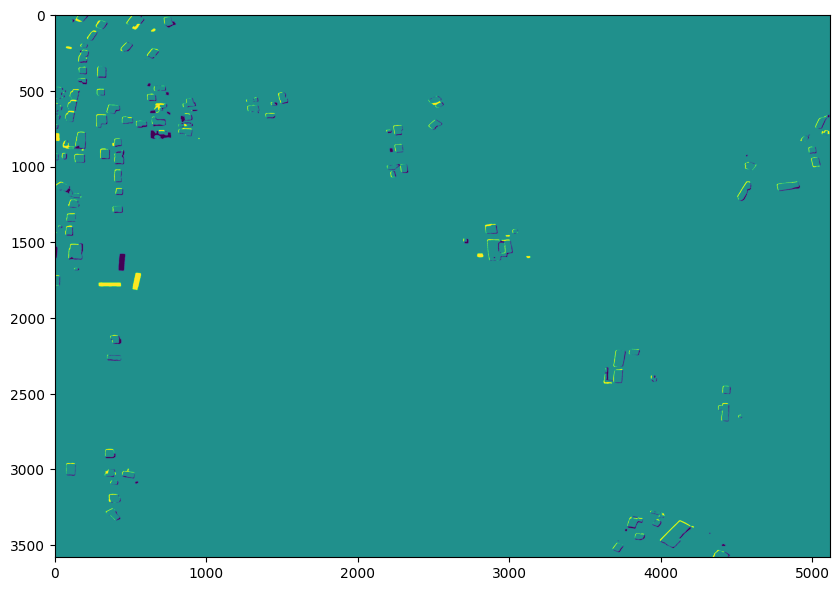

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(seg1 - seg0)

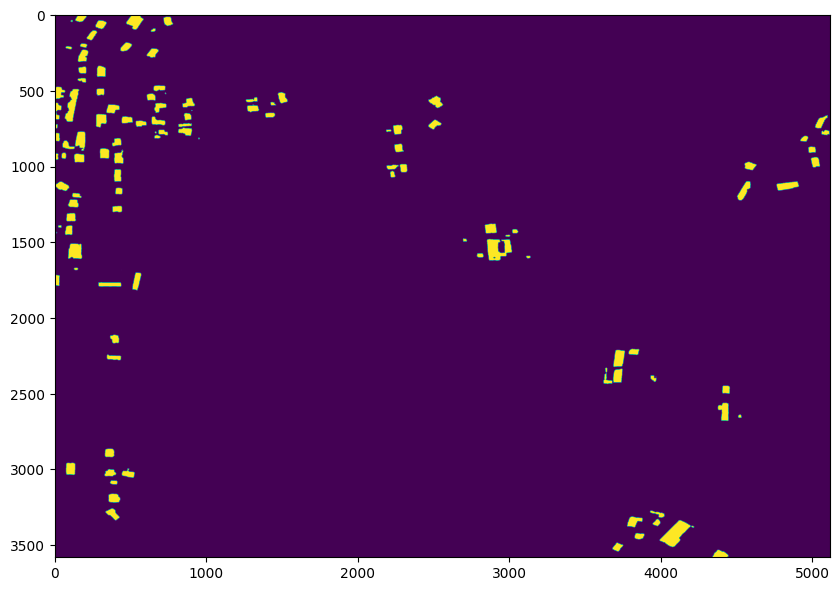

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(seg1)

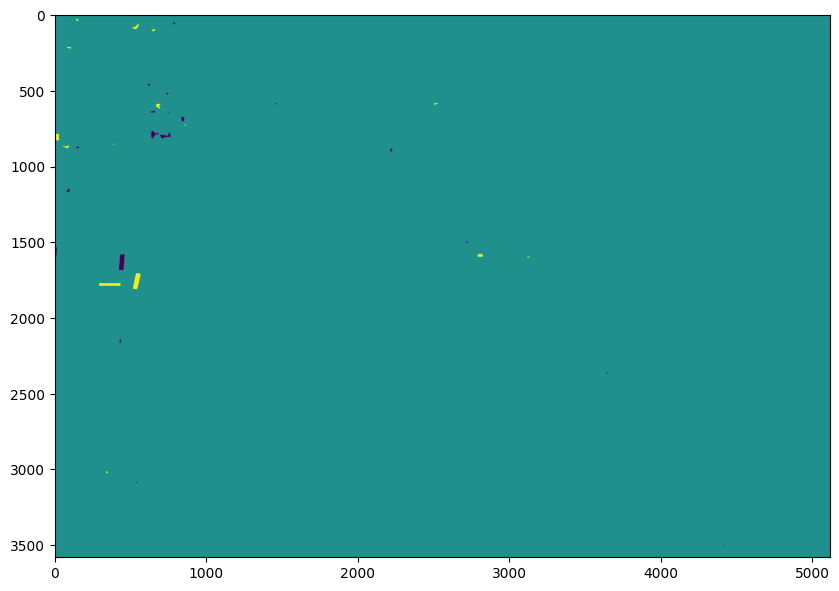

In [10]:
plt.figure(figsize=(10, 8))
plt.imshow(change)

In [11]:
change.shape

(3580, 5116)

In [12]:
change[785, 630:750]

array([ 0.,  0.,  0.,  0.,  0., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [13]:
img0 = pipe.get_image(image_path0)
img1 = pipe.get_image(image_path1)

In [14]:
785 - 529, 645 - 384

(256, 261)

In [15]:
785-256, 785+256, 640-256, 640+256

(529, 1041, 384, 896)

In [16]:
img0.shape

(3580, 5116, 3)

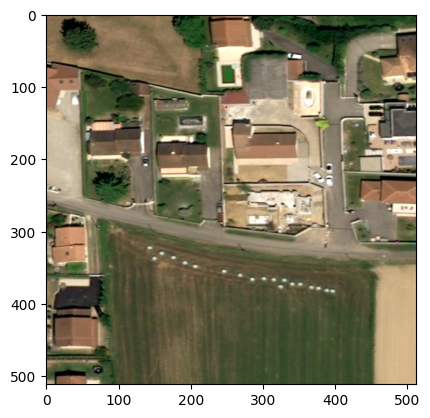

In [17]:
plt.imshow(img0[529:1041, 384:896])

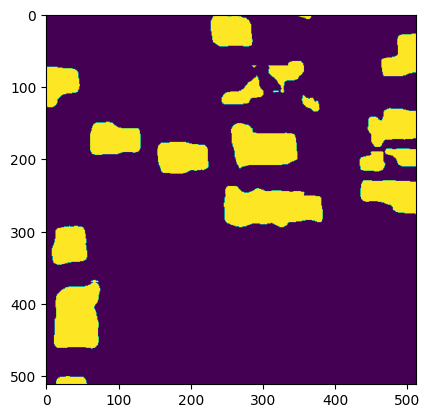

In [18]:
plt.imshow(seg0[529:1041, 384:896])

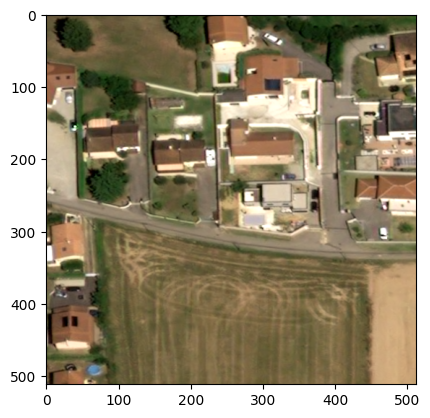

In [19]:
plt.imshow(img1[529:1041, 384:896])

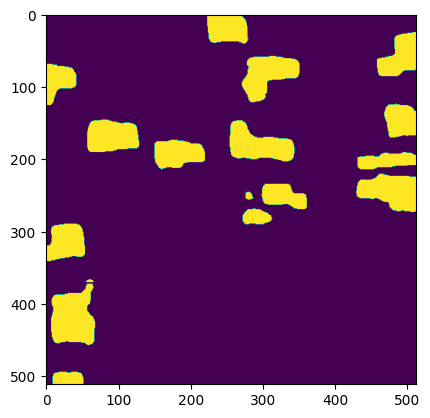

In [20]:
plt.imshow(seg1[529:1041, 384:896])

In [21]:
test = seg0[529:1041, 384:896].to(torch.int8).numpy()

In [22]:
def get_instances(mask : np.array):
        
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(mask)

    # using connected component labeling
    selem = disk(5)
    # dilated_test = dilation(mask, selem)
    # num_labels, labels = cv2.connectedComponents(dilated_test)
    num_labels, labels = cv2.connectedComponents(mask)
    properties = regionprops(labels)

    instances = []
    index = 0
    for prop in properties:

        bbox = prop.bbox
        bbox_height = bbox[2] - bbox[0]
        bbox_width = bbox[3] - bbox[1]
        if bbox_height <= 10 or bbox_width <= 10:
            continue

        # get centroid
        centroid = prop.centroid
        instances.append({
            "label": index,
            "bbox": bbox,
            "centroid": centroid
        })
        index += 1
        # plot
        minr, minc, maxr, maxc = bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        cy, cx = centroid
        ax.plot(cx, cy, 'ro')
    plt.show()
    return instances


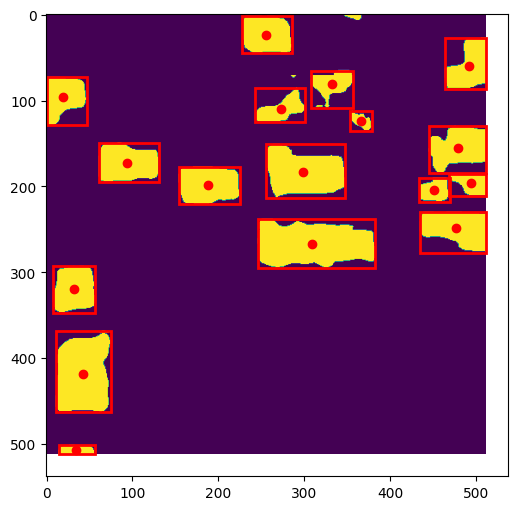

In [23]:
insts0 = get_instances(seg0[529:1041, 384:896].to(torch.int8).numpy())

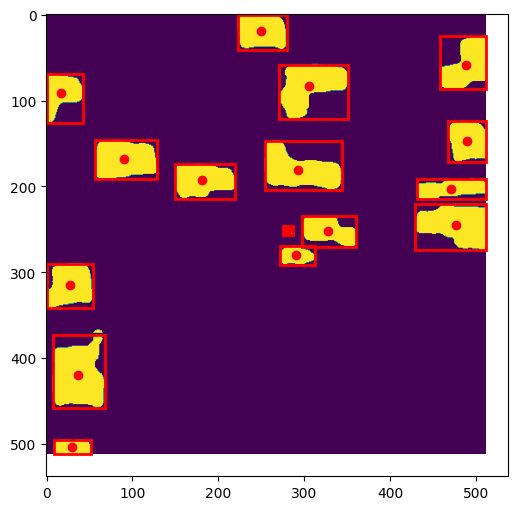

In [24]:
insts1 = get_instances(seg1[529:1041, 384:896].to(torch.int8).numpy())

In [25]:
import numpy as np
from scipy.spatial.distance import cdist

def compute_iou(box1, box2):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2
    
    xi1 = max(x1_min, x2_min)
    yi1 = max(y1_min, y2_min)
    xi2 = min(x1_max, x2_max)
    yi2 = min(y1_max, y2_max)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    
    union_area = box1_area + box2_area - inter_area
    
    iou = inter_area / union_area if union_area != 0 else 0
    
    return iou

instances_t1 = insts0
instances_t2 = insts1

# 计算质心距离矩阵
centroids_t1 = np.array([inst['centroid'] for inst in instances_t1])
centroids_t2 = np.array([inst['centroid'] for inst in instances_t2])

distance_matrix = cdist(centroids_t1, centroids_t2)

# 计算IOU矩阵
iou_matrix = np.zeros((len(instances_t1), len(instances_t2)))
for i, inst1 in enumerate(instances_t1):
    for j, inst2 in enumerate(instances_t2):
        iou_matrix[i, j] = compute_iou(inst1['bbox'], inst2['bbox'])

# 设置匹配阈值，可以根据需要调整
iou_threshold = 0.5
distance_threshold = 10.0

# 找到最佳匹配
matched_pairs = []
for i, inst1 in enumerate(instances_t1):
    best_match = None
    best_score = float('inf')
    for j, inst2 in enumerate(instances_t2):
        distance = distance_matrix[i, j]
        iou = iou_matrix[i, j]
        if distance < distance_threshold and iou > iou_threshold:
            score = distance - iou  # 综合考虑距离和IOU
            if score < best_score:
                best_score = score
                best_match = j
    if best_match is not None:
        matched_pairs.append((inst1, instances_t2[best_match]))

matched_t1_indices = [pair[0]['label'] for pair in matched_pairs]
matched_t2_indices = [pair[1]['label'] for pair in matched_pairs]

unmatched_t1 = [inst for inst in instances_t1 if inst['label'] not in matched_t1_indices]
unmatched_t2 = [inst for inst in instances_t2 if inst['label'] not in matched_t2_indices]

In [26]:
[instances_t1[i]['label'] for i in range(len(instances_t1))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [50]:
# here we suppose that t2 represents the after change image

# matched_pairs = []
# for i, inst1 in enumerate(instances_t1):
#     best_match = None
#     best_score = float('inf')
#     for j, inst2 in enumerate(instances_t2):
#         distance = distance_matrix[i, j]
#         iou = iou_matrix[i, j]
#         if distance < distance_threshold and iou > iou_threshold:
#             score = distance - iou  # 综合考虑距离和IOU
#             if score < best_score:
#                 best_score = score
#                 best_match = j
#     if best_match is not None:
#         matched_pairs.append((inst1, instances_t2[best_match]))

nearest_pairs1 = []
nearest_pairs2 = []
nn_pairs1_dict = {}
nn_pairs2_dict = {}
for i, inst1 in enumerate(unmatched_t1):
    best_score = float('inf')
    for j, inst2 in enumerate(unmatched_t2):
        distance = distance_matrix[inst1['label'], inst2['label']]
        # iou = iou_matrix[i, j]
        if distance < best_score:
            best_score = distance
            best_match = inst2['label']
    nearest_pairs1.append((inst1, instances_t2[best_match]))
    nn_pairs1_dict[inst1['label']] = instances_t2[best_match]

for j, inst2 in enumerate(unmatched_t2):
    best_score = float('inf')
    for i, inst1 in enumerate(unmatched_t1):
        distance = distance_matrix[inst1['label'], inst2['label']]
        # iou = iou_matrix[j, i]
        if distance < best_score:
            best_score = distance
            best_match = inst1['label']
    nearest_pairs2.append((instances_t1[best_match], inst2))
    nn_pairs2_dict[inst2['label']] = instances_t1[best_match]

In [72]:
def get_minimum_bounding_box(boxes):
    x_min = min(box[0] for box in boxes)
    y_min = min(box[1] for box in boxes)
    x_max = max(box[2] for box in boxes)
    y_max = max(box[3] for box in boxes)
    return (x_min, y_min, x_max, y_max)

def crop_tensor(tensor, box):
    x_min, y_min, x_max, y_max = box
    # return tensor[y_min:y_max, x_min:x_max]
    return tensor[x_min:x_max, y_min:y_max]

def calculate_iou(tensor1, tensor2):
    assert tensor1.shape == tensor2.shape
    intersection = torch.logical_and(tensor1, tensor2).sum().item()
    union = torch.logical_or(tensor1, tensor2).sum().item()
    iou = intersection / union if union != 0 else 0
    return iou

In [28]:
# 统计 nearest_pairs2 中 inst2 的匹配次数
inst1_count = {}
for inst1, inst2 in nearest_pairs2:
    label = inst1['label']
    if label in inst1_count:
        inst1_count[label] += 1
    else:
        inst1_count[label] = 1

# 统计 nearest_pairs1 中 inst1 的匹配次数
inst2_count = {}
for inst1, inst2 in nearest_pairs1:
    label = inst2['label']
    if label in inst2_count:
        inst2_count[label] += 1
    else:
        inst2_count[label] = 1
inst1_count, inst2_count

In [58]:
multi_targeted_inst2 = [key for key, value in inst2_count.items() if value > 1]
multi_targeted_inst2

[2, 8]

In [107]:
change_in_2 = set()
single_in_2 = set([inst['label'] for inst in unmatched_t2])

In [108]:
removal_in_2 = []
for label_2 in multi_targeted_inst2:
    insts = [instances_t1[key] for key, value in nn_pairs1_dict.items() if value['label'] == label_2]
    insts.append(instances_t2[label_2])
    big_box = get_minimum_bounding_box([insts[i]['bbox'] for i in range(len(insts))])
    # print(big_box)
    seg0_crop = crop_tensor(seg0[529:1041, 384:896], big_box)
    seg1_crop = crop_tensor(seg1[529:1041, 384:896], big_box)
    # plt.imshow(seg0_crop)
    # plt.show()
    # plt.imshow(seg1_crop)
    # plt.show()
    # print(calculate_iou(seg0_crop, seg1_crop))
    if calculate_iou(seg0_crop, seg1_crop)<=0.5:
        change_in_2.add(label_2)
    single_in_2.remove(label_2)
change_in_2, single_in_2

({2}, {4, 10, 11, 12})

In [109]:
multi_targeted_inst1 = [key for key, value in inst1_count.items() if value > 1]
multi_targeted_inst1

[13]

In [110]:
removal_from_1 = []
for label_1 in multi_targeted_inst1:
    insts = [instances_t2[key] for key, value in nn_pairs2_dict.items() if value['label'] == label_1]
    labels = set([inst['label'] for inst in insts])
    insts.append(instances_t1[label_1])
    big_box = get_minimum_bounding_box([insts[i]['bbox'] for i in range(len(insts))])
    # print(big_box)
    seg0_crop = crop_tensor(seg0[529:1041, 384:896], big_box)
    seg1_crop = crop_tensor(seg1[529:1041, 384:896], big_box)
    # plt.imshow(seg0_crop)
    # plt.show()
    # plt.imshow(seg1_crop)
    # plt.show()
    # print(calculate_iou(seg0_crop, seg1_crop))
    if calculate_iou(seg0_crop, seg1_crop)<0.5:
        change_in_2 = change_in_2.union(labels)
    single_in_2 = single_in_2 - labels
change_in_2, single_in_2

({2, 10, 11, 12}, {4})

In [114]:
for label_2 in single_in_2:
    inst1 = nn_pairs2_dict[label_2]
    inst2 = instances_t2[label_2]
    insts =  [inst1, inst2]
    big_box = get_minimum_bounding_box([insts[i]['bbox'] for i in range(len(insts))])
    seg0_crop = crop_tensor(seg0[529:1041, 384:896], big_box)
    seg1_crop = crop_tensor(seg1[529:1041, 384:896], big_box)
    print(calculate_iou(seg0_crop, seg1_crop))
    if calculate_iou(seg0_crop, seg1_crop)<0.5:
        change_in_2.add(label_2)
change_in_2

0.5392539964476021


{2, 10, 11, 12}

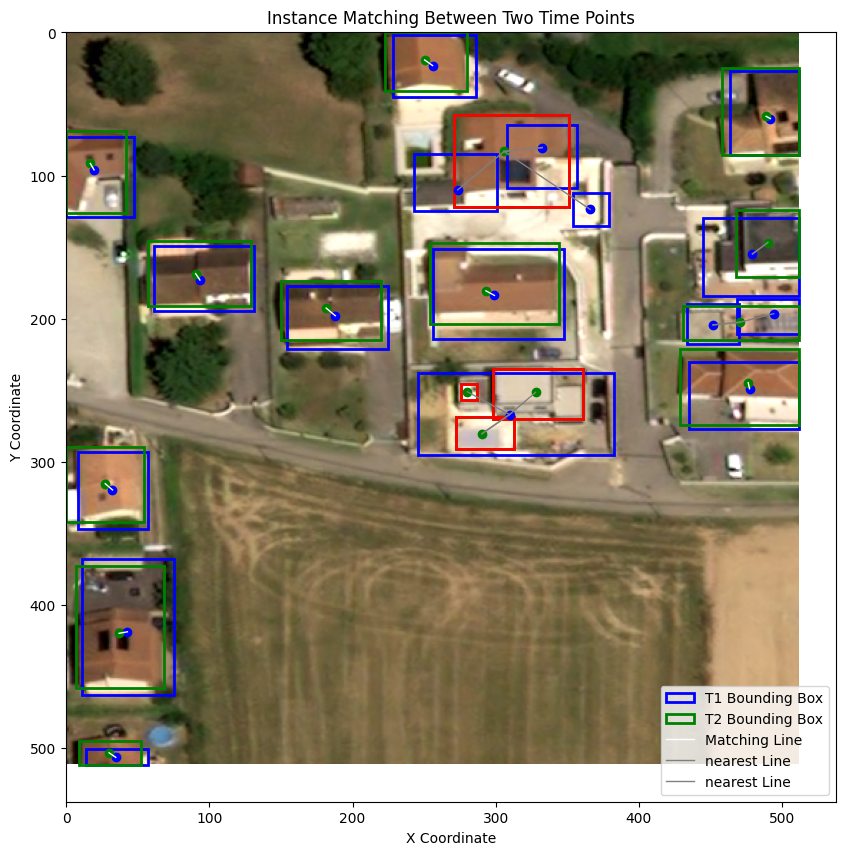

In [129]:
# 绘图
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(img1[529:1041, 384:896])
# 绘制 T1 实例
for i, inst in enumerate(instances_t1):
    centroid = inst['centroid']
    bbox = inst['bbox']
    cy, cx = centroid
    ax.plot(cx, cy, 'bo')
    # ax.scatter(*centroid, c='blue', label='T1 Centroid' if inst['label'] == 1 else "")
    rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         edgecolor='blue', facecolor='none', linewidth=2, label='T1 Bounding Box' if i == 0 else "")
    ax.add_patch(rect)

# 绘制 T2 实例
for i, inst in enumerate(instances_t2):
    centroid = inst['centroid']
    bbox = inst['bbox']
    cy, cx = centroid
    ax.plot(cx, cy, 'go')
    # ax.scatter(*centroid, c='green', label='T2 Centroid' if inst['label'] == 1 else "")
    rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         edgecolor='green', facecolor='none', linewidth=2, label='T2 Bounding Box' if i == 0 else "")
    ax.add_patch(rect)

# 绘制匹配线
for pair in matched_pairs:
    centroid_t1 = pair[0]['centroid']
    centroid_t2 = pair[1]['centroid']
    ax.plot([centroid_t1[1], centroid_t2[1]], [centroid_t1[0], centroid_t2[0]], 'w', linewidth=1, label='Matching Line' if pair == matched_pairs[0] else "")

for pair in nearest_pairs1:
    centroid_t1 = pair[0]['centroid']
    centroid_t2 = pair[1]['centroid']
    ax.plot([centroid_t1[1], centroid_t2[1]], [centroid_t1[0], centroid_t2[0]], 'gray', linewidth=1, label='nearest Line' if pair == nearest_pairs1[0] else "")

for pair in nearest_pairs2:
    centroid_t1 = pair[0]['centroid']
    centroid_t2 = pair[1]['centroid']
    ax.plot([centroid_t1[1], centroid_t2[1]], [centroid_t1[0], centroid_t2[0]], 'gray', linewidth=1, label='nearest Line' if pair == nearest_pairs2[0] and nearest_pairs1==[] else "")

for label in change_in_2:
    bbox = instances_t2[label]['bbox']
    rect = plt.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0],
                         edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(rect)

ax.legend()
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Instance Matching Between Two Time Points')
plt.show()

In [40]:
from shapely.geometry import box, Polygon
from shapely.ops import unary_union

def compute_iou_multi(boxes_to_merge : list,
                      instance : tuple):
    def compute_iou(poly1, poly2):
        # 计算交集面积
        inter_area = poly1.intersection(poly2).area
        # 计算并集面积
        union_area = poly1.union(poly2).area
        # 计算 IoU
        iou = inter_area / union_area if union_area != 0 else 0
        return iou
    # 示例数据
    # boxes_to_merge = [
    #     (0, 0, 2, 2),
    #     (1, 1, 3, 3),
    #     (2, 0, 4, 2)
    # ]

    # 将矩形转换为多边形
    polygons = [box(*b) for b in boxes_to_merge]

    # 合并多个矩形为一个多边形
    merged_polygon = unary_union(polygons)

    # 将另一个矩形转换为多边形
    another_polygon = box(*instance)

    # 计算合并后的多边形与另一个矩形的 IoU
    iou = compute_iou(merged_polygon, another_polygon)

    print(f"Merged Polygon: {merged_polygon}")
    print(f"IoU: {iou}")